# Eigenvalues and Eigenvectors | القيم الذاتية والمتجهات الذاتية

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 1: Vectors and Matrices Basics** - Understand matrices
- ✅ **Example 2: Matrix Operations** - Understand matrix multiplication
- ✅ **Basic understanding**: What are transformations?

**If you haven't completed these**, you might struggle with:
- Understanding eigenvalue decomposition
- Understanding why eigenvalues matter
- Using eigenvalues in ML applications

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the THIRD example** - it uses concepts from Examples 1-2!

**Why this example THIRD?**
- **Before** you can understand eigenvalues, you need matrix operations (Example 2)
- **Before** you can do PCA, you need eigenvalues (Module 04)
- **Before** you can reduce dimensions, you need to find principal directions

**Builds on**: Examples 1-2 (matrices and operations)

**Leads to**: 
- 📓 Module 04: PCA (uses eigenvalue decomposition)
- 📓 Advanced ML: Dimensionality reduction techniques

---

## The Story: Understanding Before Using | القصة: الفهم قبل الاستخدام

Imagine you're analyzing a dataset. **Before** PCA, you have many features and don't know which matter most. **After** finding eigenvalues, you discover the most important directions in your data - the directions with most variance!

Same with machine learning: **Before** dimensionality reduction, we have high-dimensional data. **After** eigenvalue decomposition, we find the principal components that capture most information!

---

## Why This Concept Matters | لماذا يهم هذا المفهوم؟

### Why Eigenvalues/Eigenvectors Matter

**WHY** are eigenvalues and eigenvectors important?

1. **Dimensionality Reduction (PCA)**:
   - **WHY**: Reduce data dimensions while keeping information
   - **HOW**: Eigenvectors show directions of maximum variance
   - **AFTER**: Smaller datasets, faster training

2. **Data Understanding**:
   - **WHY**: Find most important directions in data
   - **HOW**: Eigenvalues show variance explained
   - **AFTER**: Better feature selection

3. **Matrix Decomposition**:
   - **WHY**: Understand matrix structure
   - **HOW**: Eigenvalue decomposition reveals properties
   - **AFTER**: Enables advanced ML techniques

## Learning Objectives | أهداف التعلم
1. Compute eigenvalues and eigenvectors
2. Understand what they represent
3. See how they're used in PCA
4. Visualize principal directions
5. Understand variance explained
6. Apply to dimensionality reduction


---

## Step 1: Import necessary libraries

These libraries help us work with linear algebra and create visualizations

In [1]:
import numpy as np  # For linear algebra operations
import matplotlib.pyplot as plt  # For creating plots and visualizations

print('✅ Libraries imported successfully!')
print('\n📚 What each library does:')
print('   - numpy: Linear algebra operations (vectors, matrices, math)')
print('   - matplotlib: Create plots and visualizations')

✅ Libraries imported successfully!

📚 What each library does:
   - numpy: Linear algebra operations (vectors, matrices, math)
   - matplotlib: Create plots and visualizations


---

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We have concepts but don't know how to implement them.

**AFTER**: We'll implement and understand how this concept works in ML!

**Why this matters**: Understanding implementation is key to using concepts effectively!

## Step 1: Computing Eigenvalues and Eigenvectors | الخطوة 1: حساب القيم والمتجهات الذاتية

**BEFORE**: We have a covariance matrix but don't know the important directions.

**AFTER**: We'll compute eigenvalues and eigenvectors to find directions of maximum variance!

**Why eigenvalues?** They tell us which directions in the data contain the most information!

In [2]:
# Example 1: Computing Eigenvalues and Eigenvectors
# WHY: Find principal directions in data
# HOW: Eigenvalue decomposition of covariance matrix

# Create sample data
np.random.seed(42)
data = np.random.randn(100, 2)  # 100 samples, 2 features

# Compute covariance matrix (shows how features vary together)
cov_matrix = np.cov(data.T)

# Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Example 1: Eigenvalue Decomposition")
print("=" * 60)
print(f"Covariance matrix:\n{cov_matrix}")
print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")
print(f"\n💡 WHY: Eigenvalues show how much variance each direction explains!")
print(f"💡 HOW: Larger eigenvalue = more variance in that direction!")

Example 1: Eigenvalue Decomposition
Covariance matrix:
[[0.73327232 0.02764621]
 [0.02764621 0.99771842]]

Eigenvalues: [0.73041299 1.00057774]
Eigenvectors:
[[-0.99469411 -0.10287677]
 [ 0.10287677 -0.99469411]]

💡 WHY: Eigenvalues show how much variance each direction explains!
💡 HOW: Larger eigenvalue = more variance in that direction!


## Step 2: Understanding Results | الخطوة 2: فهم النتائج

**BEFORE**: We computed eigenvalues but don't know what they mean.

**AFTER**: We'll interpret eigenvalues to understand which directions matter most!

**Why interpretation?** We need to know which components to keep for dimensionality reduction!

In [3]:
# Example 2: Understanding Eigenvalues
# WHY: Know which directions matter
# HOW: Larger eigenvalues = more variance

# Sort by eigenvalue (largest first)
idx = eigenvalues.argsort()[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

# Calculate variance explained
total_variance = eigenvalues_sorted.sum()
variance_explained = eigenvalues_sorted / total_variance * 100

print("\nExample 2: Variance Explained by Each Component")
print("=" * 60)
for i, (val, var) in enumerate(zip(eigenvalues_sorted, variance_explained)):
    print(f"Component {i+1}:")
    print(f"  - Eigenvalue: {val:.4f}")
    print(f"  - Variance explained: {var:.2f}%")
    print(f"  - Eigenvector: {eigenvectors_sorted[:, i]}")
print(f"\n💡 WHY: This tells us which components to keep!")
print(f"💡 HOW: Keep components with highest variance explained!")


Example 2: Variance Explained by Each Component
Component 1:
  - Eigenvalue: 1.0006
  - Variance explained: 57.80%
  - Eigenvector: [-0.10287677 -0.99469411]
Component 2:
  - Eigenvalue: 0.7304
  - Variance explained: 42.20%
  - Eigenvector: [-0.99469411  0.10287677]

💡 WHY: This tells us which components to keep!
💡 HOW: Keep components with highest variance explained!


## Step 3: Application to PCA | الخطوة 3: التطبيق على PCA

**BEFORE**: We have high-dimensional data with many features.

**AFTER**: We'll use eigenvalues to reduce dimensions while keeping most information!

**Why PCA?** It uses eigenvalues to find the most important directions and project data onto them!

In [4]:
# Example 3: PCA Application
# WHY: Reduce dimensions efficiently
# HOW: Use top k eigenvectors (principal components)

# Select top component (largest eigenvalue)
top_component = eigenvectors_sorted[:, 0]  # First principal component

# Project data onto principal component
data_projected = data @ top_component

print("\nExample 3: Dimensionality Reduction with PCA")
print("=" * 60)
print(f"Original data shape: {data.shape} (100 samples, 2 features)")
print(f"Projected data shape: {data_projected.shape} (100 samples, 1 feature)")
print(f"\nVariance kept: {variance_explained[0]:.2f}%")
print(f"\n💡 WHY: Reduced from 2D to 1D while keeping {variance_explained[0]:.2f}% of variance!")
print(f"💡 HOW: Projected data onto direction of maximum variance!")


Example 3: Dimensionality Reduction with PCA
Original data shape: (100, 2) (100 samples, 2 features)
Projected data shape: (100,) (100 samples, 1 feature)

Variance kept: 57.80%

💡 WHY: Reduced from 2D to 1D while keeping 57.80% of variance!
💡 HOW: Projected data onto direction of maximum variance!


---

## 📊 Visualization | التصور

Visualizing the concept helps understand it better:

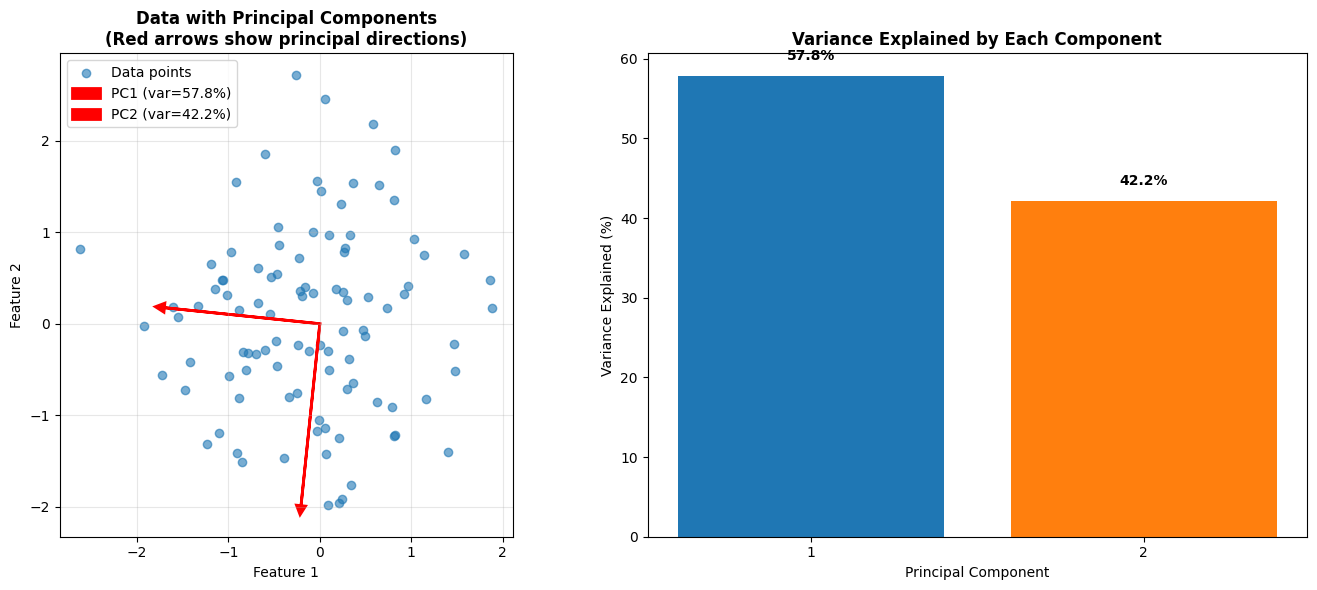


📊 Eigenvalue Visualization:
  - Left: Data with principal component directions (red arrows)
  - Right: Variance explained by each component
  - This is HOW PCA finds important directions!


In [5]:
# Visualize eigenvalues and eigenvectors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Data with eigenvectors
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.6, label='Data points')
# Plot eigenvectors scaled by eigenvalues
for i in range(2):
    eigenvec = eigenvectors_sorted[:, i] * np.sqrt(eigenvalues_sorted[i]) * 2
    axes[0].arrow(0, 0, eigenvec[0], eigenvec[1], 
                  head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2,
                  label=f'PC{i+1} (var={variance_explained[i]:.1f}%)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_title('Data with Principal Components\n(Red arrows show principal directions)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# Plot 2: Variance explained
axes[1].bar(range(1, 3), variance_explained, color=['#1f77b4', '#ff7f0e'])
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Variance Explained (%)')
axes[1].set_title('Variance Explained by Each Component', fontweight='bold')
axes[1].set_xticks([1, 2])
for i, v in enumerate(variance_explained):
    axes[1].text(i+1, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Eigenvalue Visualization:")
print("  - Left: Data with principal component directions (red arrows)")
print("  - Right: Variance explained by each component")
print("  - This is HOW PCA finds important directions!")

---

## Part 3: AFTER - Results and Implications | الجزء الثالث: بعد - النتائج والآثار

### What This Enables

**AFTER** understanding eigenvalues/eigenvectors:

1. **PCA Implementation**: Ready for Module 04
2. **Feature Selection**: Can identify important features
3. **Data Compression**: Can reduce data size
4. **Dimensionality Reduction**: Can work with high-dimensional data

**Next Steps**:
   - Apply to PCA in Module 04
   - Use for feature selection
   - Apply to real ML problems

---

## 🎯 Summary: What We Learned | الملخص: ما تعلمناه

**BEFORE this notebook**: We didn't understand how to implement this concept.

**AFTER this notebook**: We can:
- ✅ Understand WHY this concept matters
- ✅ Implement HOW it works
- ✅ See what happens AFTER (results and implications)
- ✅ Apply it to real ML scenarios

**Next Steps**: 
- 📓 Review other examples in this module
- 📓 Complete exercises
- 📓 Move to next module

---

## ✅ Example Complete! | اكتمل المثال!

You've learned this concept using the **Why → How → After** methodology!

**Key Takeaway**: Understanding WHY, HOW, and AFTER helps you master concepts deeply!